# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

666

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name = []
country = []
date = []
cloudiness = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
index = 1

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        
        print(f"Processing record {index}: {city}")
        index+=1
        
    except (KeyError):
        print("City not found. skipping.")
            


Processing record 1: mount isa
Processing record 2: mataura
Processing record 3: busselton
Processing record 4: kattivakkam
City not found. skipping.
Processing record 5: parrita
Processing record 6: punta arenas
Processing record 7: carnarvon
Processing record 8: katsuura
Processing record 9: solnechnyy
Processing record 10: ushuaia
Processing record 11: hirara
Processing record 12: namatanai
Processing record 13: barrow
Processing record 14: erenhot
Processing record 15: albany
Processing record 16: khatanga
Processing record 17: fukue
Processing record 18: hualmay
Processing record 19: natal
Processing record 20: georgetown
Processing record 21: lufilufi
City not found. skipping.
Processing record 22: sinegorye
Processing record 23: new norfolk
Processing record 24: vaini
Processing record 25: kimbe
Processing record 26: hobart
Processing record 27: atuona
Processing record 28: waiouru
Processing record 29: faya
City not found. skipping.
Processing record 30: half moon bay
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather = pd.DataFrame({ 
                "City" : city_name,
                "Country": country,
                "Date": date,
                "Cloudiness" : cloudiness,
                "Humidity" : humidity,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Wind Speed" : wind_speed
})

weather

,City,Country,Date,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mount Isa,AU,1622171399,35,22,-20.7333,139.5000,74.97,10.36
1,Mataura,NZ,1622171399,100,94,-46.1927,168.8643,49.48,4.16
2,Busselton,AU,1622171399,1,58,-33.6500,115.3333,73.04,14.81
3,Kattivākkam,IN,1622171400,33,61,13.2167,80.3167,89.08,13.20
4,Parrita,CR,1622171400,100,87,9.5201,-84.3225,82.17,2.21
...,...,...,...,...,...,...,...,...,...
597,Assiut,EG,1622171586,0,32,27.1810,31.1837,78.53,8.75
598,Veinticinco de Diciembre,MX,1622171586,74,11,25.2602,-104.0519,92.75,6.78
599,Shakawe,BW,1622171587,0,45,-18.3667,21.8500,48.20,3.56
600,Itoman,JP,1622171587,75,87,26.1247,127.6694,86.38,17.27


In [5]:
weather.to_csv("output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.

There are no cities with humidity > 100%. Skipping this step

## Plotting the Data

## Latitude vs. Temperature Plot

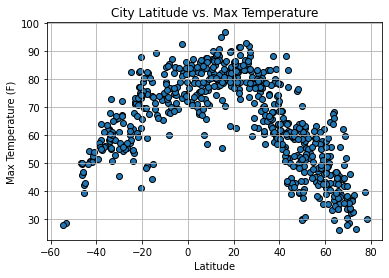

In [6]:
plt.scatter(weather["Lat"], weather["Max Temp"], edgecolor = "black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-')
plt.savefig("Images/City Latitude vs Max Temperature.png")

This scatter plot shows the temperature of each city vs the latitude of each city. Peak temperature is at 0 latitude (the equator) and as the latitude increases/decreases, the temperature drops. Temperature drops are steeper as the latitude increases.

## Latitude vs. Humidity Plot

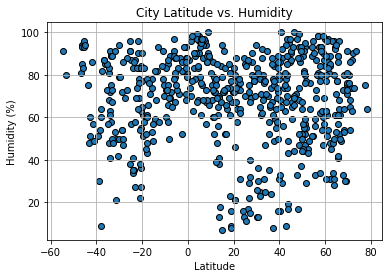

In [7]:
plt.scatter(weather["Lat"], weather["Humidity"], edgecolor = "black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-')
plt.savefig("Images/City Latitude vs Humidity.png")

This scatter plot shows the % humidity of each city vs the latitude of each city. Humidity is variable at all latitudes but there seems to be less humidity around 20 degrees latutide, with higher percent humidity as you moce closer to the poles.

## Latitude vs. Cloudiness Plot

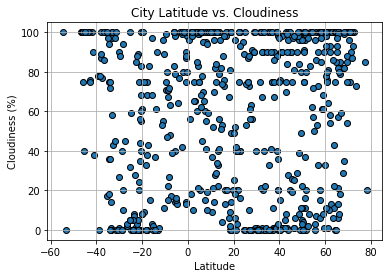

In [8]:
plt.scatter(weather["Lat"], weather["Cloudiness"], edgecolor = "black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linestyle='-')
plt.savefig("Images/City Latitude vs Cloudiness.png")

This scatter plot shows the percent cloudiness of each city vs the latitude of each city. Percent cloudiness is spread across all latitudes, except for cities located in latitudes between 0 and -20. According to this plot, cities located between latitudes 0 and -20 have a higher proportion of cities with higher percent cloudiness.

## Latitude vs. Wind Speed Plot

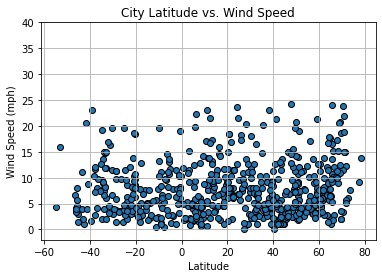

In [9]:
plt.scatter(weather["Lat"], weather["Wind Speed"], edgecolor = "black")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,40)
plt.grid(linestyle='-')
plt.savefig("Images/City Latitude vs Wind Speed.png")

This scatter plot shows the wind speed of each city vs the latitude of each city. Only a few cities that are further away from the equator, at latitudes < -40 or > 40 have wind speeds higher than 30 mph. 

## Linear Regression

In [10]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather.loc[weather["Lat"] >= 0]
southern_hemisphere = weather.loc[weather["Lat"] < 0]

# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The Pearson correlation coefficient is {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define fuction for annotation
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The Pearson correlation coefficient is -0.83


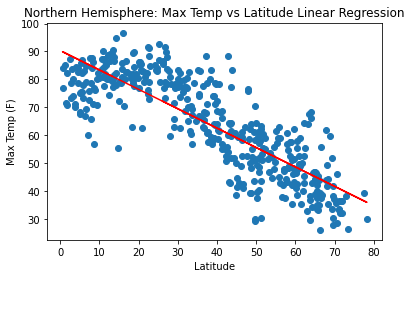

In [11]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
annotate(equation, 0, 0)

plt.title("Northern Hemisphere: Max Temp vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("Images/Northern Hemisphere: Max Temp vs Latitude Linear Regression.png")

In the Northern Hemisphere (latitude > 0), there is a strong negative linear relationship between the latitude of a city and the max temperature of a city.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The Pearson correlation coefficient is 0.76


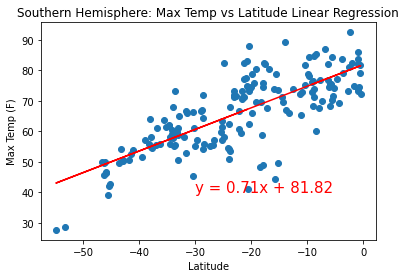

In [12]:
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])
annotate(equation, -30, 40)

plt.title("Southern Hemisphere: Max Temp vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("Images/Southern Hemisphere: Max Temp vs Latitude Linear Regression.png")

In the Southern Hemisphere (latitude < 0), there is a moderate positive linear relationship between the the latitude of a city and the max temperature of a city.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The Pearson correlation coefficient is -0.05


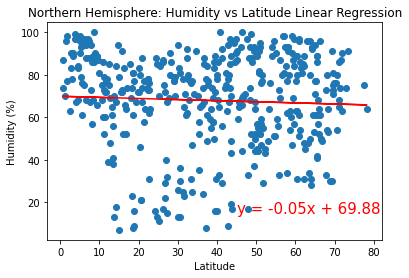

In [13]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
annotate(equation, 45, 15)

plt.title("Northern Hemisphere: Humidity vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Images/Northern Hemisphere: Humidity vs Latitude Linear Regression.png")

In the Northern Hemisphere (latitude > 0), there is a weak positive linear relationship between the latitude of a city and the percent humidity of a city.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The Pearson correlation coefficient is 0.11


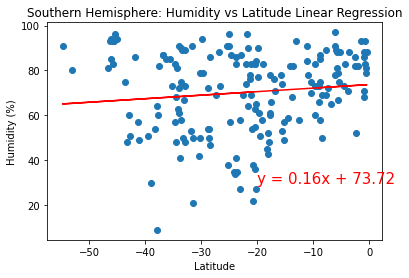

In [14]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
annotate(equation, -20, 30)

plt.title("Southern Hemisphere: Humidity vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Images/Southern Hemisphere: Humidity vs Latitude Linear Regression.png")

In the Southern Hemisphere (latitude < 0), there is a weak positive linear relationship between the latitude of a city and the percent humidity of a city.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The Pearson correlation coefficient is 0.06


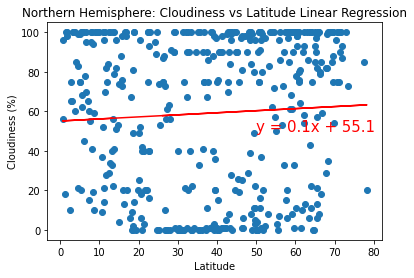

In [15]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
annotate(equation, 50, 50)

plt.title("Northern Hemisphere: Cloudiness vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Images/Northern Hemisphere: Cloudiness(%) vs Latitude Linear Regression.png")

In the Northern Hemisphere (latitude > 0), there is a weak positive linear relationship between the latitude of a city and the percent cloudiness of a city.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The Pearson correlation coefficient is -0.07


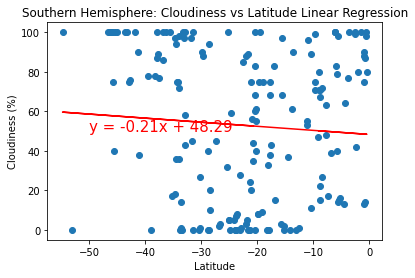

In [16]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
annotate(equation, -50, 50)

plt.title("Southern Hemisphere: Cloudiness vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Images/Southern Hemisphere: Cloudiness vs Latitude Linear Regression.png")

In the Southern Hemisphere (latitude < 0), there is a weak positive linear relationship between the latitude of a city and the percent cloudiness of a city.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Pearson correlation coefficient is 0.09


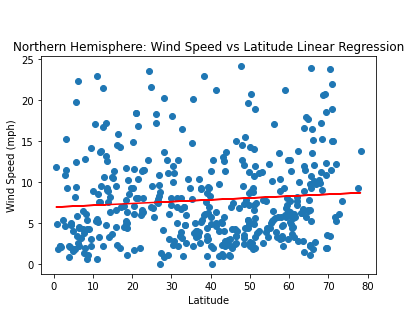

In [17]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
annotate(equation, 0, 30)

plt.title("Northern Hemisphere: Wind Speed vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Images/Northern Hemisphere: Wind Speed vs Latitude Linear Regression.png")

In the Northern Hemisphere (latitude > 0), there is a weak positive linear relationship between the latitude of a city and wind speeds in a city.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Pearson correlation coefficient is -0.07


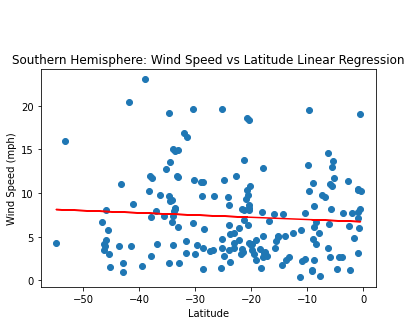

In [18]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
annotate(equation, -30, 30)

plt.title("Southern Hemisphere: Wind Speed vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Images/Southern Hemisphere: Wind Speed vs Latitude Linear Regression.png")

In the Southern Hemisphere (latitude < 0), there is a moderate negative linear relationship between the latitude of a city and wind speeds in a city.